<a href="https://colab.research.google.com/github/Doclikam/Python-pydata/blob/main/food_carbon_footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'
carbon_footprint=pd.read_csv(url, sep=',')



In [12]:
carbon_footprint.head(2)
carbon_footprint.shape
carbon_footprint.info()
carbon_footprint.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [17]:
carbon_footprint.head(2)

east_africa=['Kenya',' Uganda','Tanzania', 'Rwanda','Ethiopia']

countries=carbon_footprint[carbon_footprint['country'].isin(east_africa)]
countries

,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [22]:
countries.shape
countries.info()
countries.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 902 to 1286
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        44 non-null     object 
 1   food_category  44 non-null     object 
 2   consumption    44 non-null     float64
 3   co2_emmission  44 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [49]:
emmissions_df=countries.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=True).reset_index()

In [50]:
emmissions_df

,food_category,co2_emmission
0,Soybeans,0.2950
1,Eggs,0.6750
2,Poultry,1.1575
3,Pork,1.2300
4,Nuts inc. Peanut Butter,4.1450
5,Wheat and Wheat Products,4.4425
6,Fish,5.5450
7,Rice,14.3650
8,Lamb & Goat,58.1350
9,Milk - inc. cheese,66.4200


0                         Beef
1           Milk - inc. cheese
2                  Lamb & Goat
3                         Rice
4                         Fish
5     Wheat and Wheat Products
6      Nuts inc. Peanut Butter
7                         Pork
8                      Poultry
9                         Eggs
10                    Soybeans
Name: food_category, dtype: object

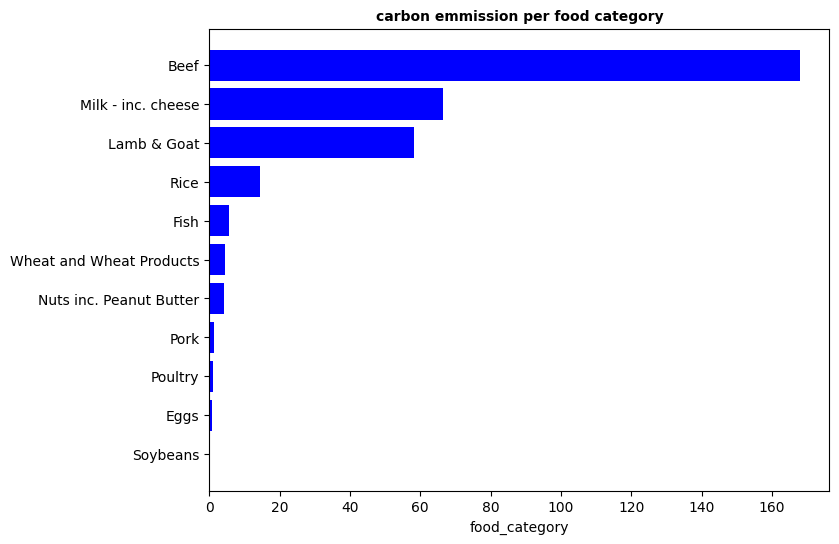

In [51]:
food=emmissions_df['food_category']
emmission=emmissions_df['co2_emmission']

plt.figure(figsize=(8,6))
plt.barh(food,emmission, color='blue')

plt.title('carbon emmission per food category', fontsize=10, fontweight='bold')
plt.xlabel('food_category')
plt.show()
